# Assignment 19

In [114]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [115]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [116]:
penguins.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

## Creating the model

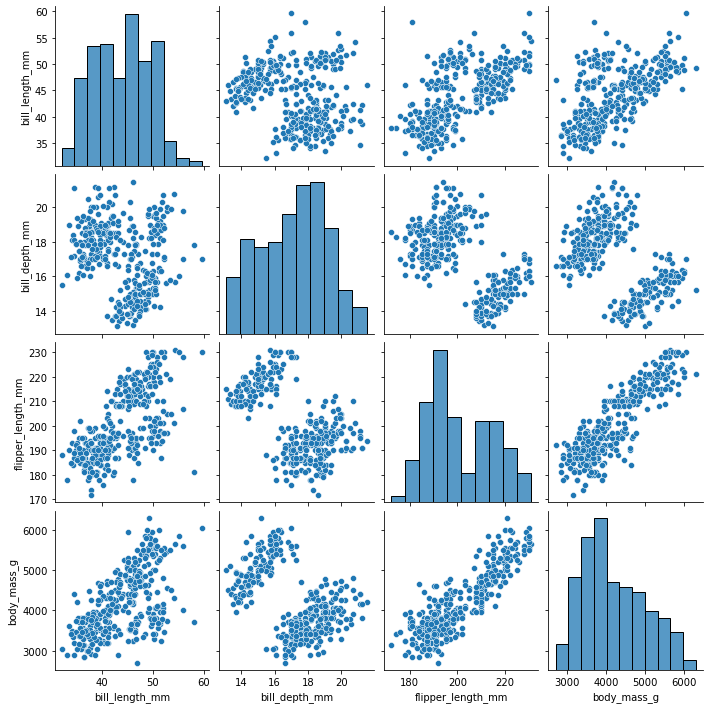

In [117]:
sns.pairplot(penguins)

If i take a look at the pairplot i can ee most often 2 clusters, however sometimes it seems to be 3 clusters. So i'll start off with 2 clusters and then do 3.

To prepare the dataset for KMeans i'll have to take out the NaN values since KMeans can't deal with those. After checking the values it seems the sex is missing a value in 9 records. While 2 records have no numerical data at all. I'll be replacing the "sex" NaN's with "Unknown" and drop the remaining NaN's

In [118]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [119]:
penguins = penguins.fillna({"sex":"Unknown"})
penguins = penguins.dropna()
penguins.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [120]:
features = ["flipper_length_mm", "bill_length_mm", "bill_depth_mm", "body_mass_g"]
km = KMeans(n_clusters=2, random_state=42).fit(penguins[features])

In [121]:
penguins['cluster'] = km.predict(penguins[features])

In [122]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0


In [123]:
penguins.cluster.value_counts()

0    209
1    133
Name: cluster, dtype: int64

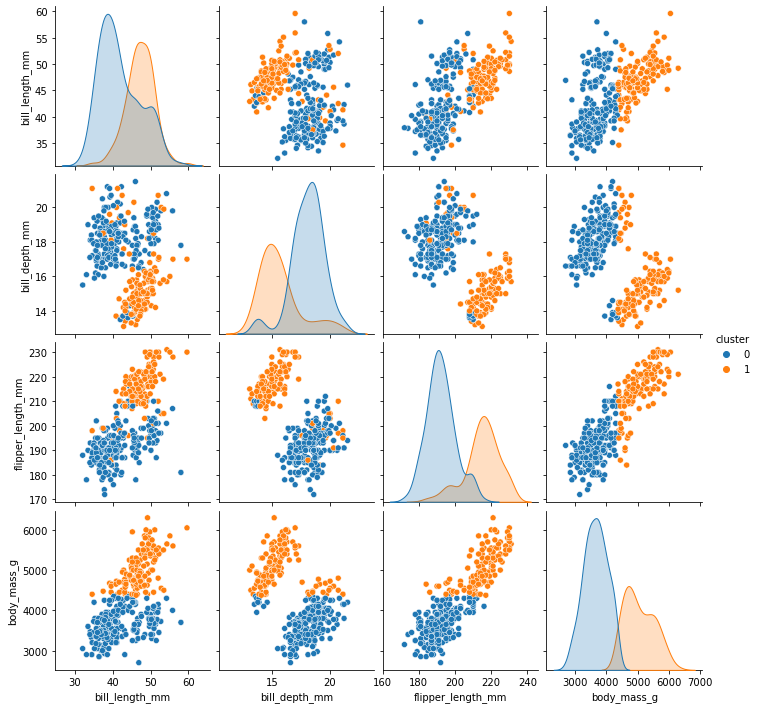

In [124]:
sns.pairplot(penguins, hue="cluster")

## Evaluating the model

In [125]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [126]:
# You can change the features and n_clusters in the k-means above and check the impact on the Silhouette Coefficient
metrics.silhouette_score(penguins[features], km.labels_, metric='euclidean')

0.629579467155965

2 Clusters has a score of 0.629579467155965\
3 Clusters has a score of 0.5797312301820455\
4 Clusters has a score of 0.5544688497810264

Therefore 2 Clusters has the best score.

In [127]:
contingency_table = penguins.groupby(['species','cluster']).size().unstack('cluster', fill_value=0)
contingency_table

cluster,0,1
species,,
Adelie,137,14
Chinstrap,63,5
Gentoo,9,114


It seems like Chinstrap and Adelie are hard to seperate from eachother, i've tried looking at the contingency_table with 3 clusters instead of 2 but it still has a hard time seperating these 2 species. However it seems it doesn't have too much trouble seperating the Gentoo from the rest, tho it isn't perfect.